# Stability analysis of the Deformed Pazy Wing

Herein we present the stability results of the deformed Pazy wing casued by the aerodynamic loading at a non-zero angle of attack. The results are stored in either the
`sharpy_skin_off` or `sharpy_skin_on` folders, each containing the following files:
  * `velocity_eigenvalues_alpha0000.txt`: three column array containing the velocity, real and imaginary part of the eigenvalue (rad/s) for each angle of attack.
  * `velocity_damping_frequency_alpha0000.txt`: three column array containing the velocity, damping ratio and natural frequency (Hz) at each angle of attack.
  * `velocity_wingtip_deflection_g_alpha0000.txt`: four column array contain the velocity, x, y and z (inertial frame, metres) wing tip displacement at each angle of attack.
  * `flutter_speeds_alpha0000.txt`: two column array containing the flutter speed (m/s) and span-normalised, vertical wing tip displacement in the inertial frame. Note, the second speed (out of 3) may be the first flutter mode's stabilisation speed.
  
All cases have been run at density=1.225kg/m3 and without gravity. The full test case script is available at the reference below:

Version control:
  * SHARPy: v1.1.1-253-g98444c3-98444c3
  * Test script and postprocess: `ngoiz/pazy-sharpy/05_DeformedWingFlutter` 
  * Pazy wing model: `ngoiz/pazy-model` ec08df29cb602020cfcb5043d31a82f73f333d84


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [48]:
sharpy_results = {}

sharpy_results['wo_skin'] = {'path': './sharpy_skin_off',
                             'alpha': np.array([0.5, 1, 2, 3, 4, 5]),
                            'skin': False}

In [49]:
for case in sharpy_results.values():
    case['vgf'] = [np.loadtxt(case['path'] + '/velocity_damping_frequency_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['v_eigs'] = [np.loadtxt(case['path'] + '/velocity_eigenvalues_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['deflection'] = [np.loadtxt(case['path'] + '/velocity_wingtip_deflection_g_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]
    case['flutter_deflection'] = [np.loadtxt(case['path'] + '/flutter_speeds_alpha{:04g}.txt'.format(aoa * 100)) for aoa in case['alpha']]

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "./sharpy_skin_off/flutter_speeds_alpha0400.txt"
  """
/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "./sharpy_skin_off/flutter_speeds_alpha0500.txt"
  """


# Skin off results
## V-g-omega plot

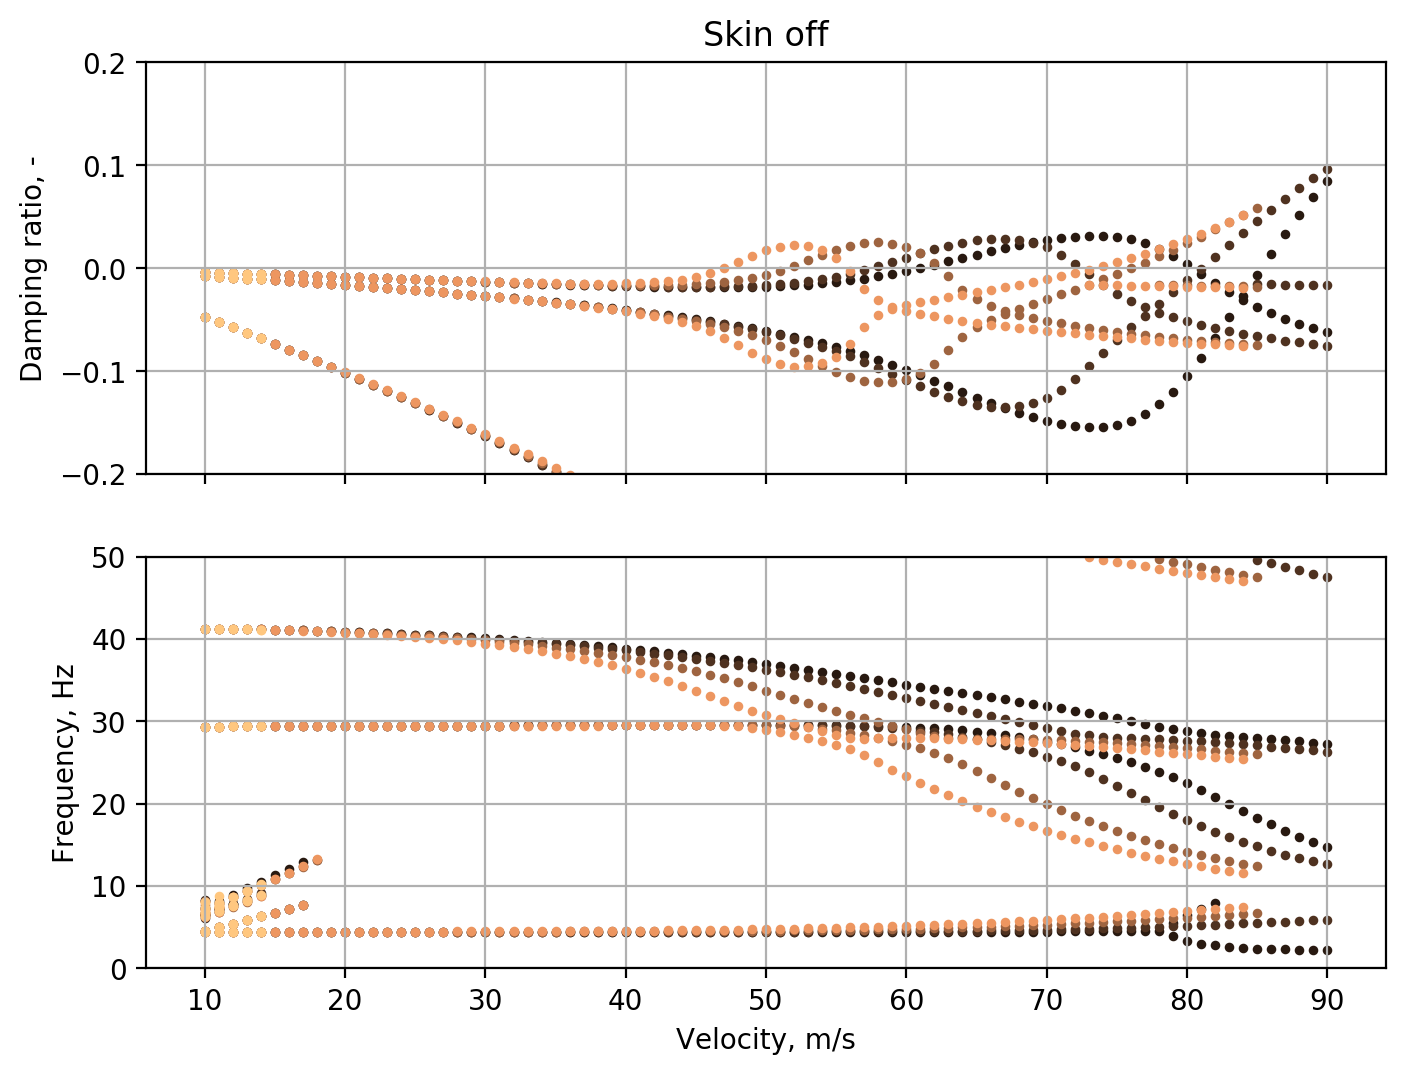

In [50]:
case = sharpy_results['wo_skin']
fig, ax = plt.subplots(nrows=2, sharex=True)
cmap = plt.get_cmap('copper')
nrm = plt.Normalize(vmin=0, vmax=4)

for ith, aoa in enumerate(case['alpha']):
    ax[0].scatter(case['vgf'][ith][:, 0], case['vgf'][ith][:, 1], color=cmap(nrm(aoa)), s=6)
    ax[1].scatter(case['vgf'][ith][:, 0], case['vgf'][ith][:, 2], color=cmap(nrm(aoa)), s=6)
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[0].set_title('Skin off');

## Eigenvalue plot

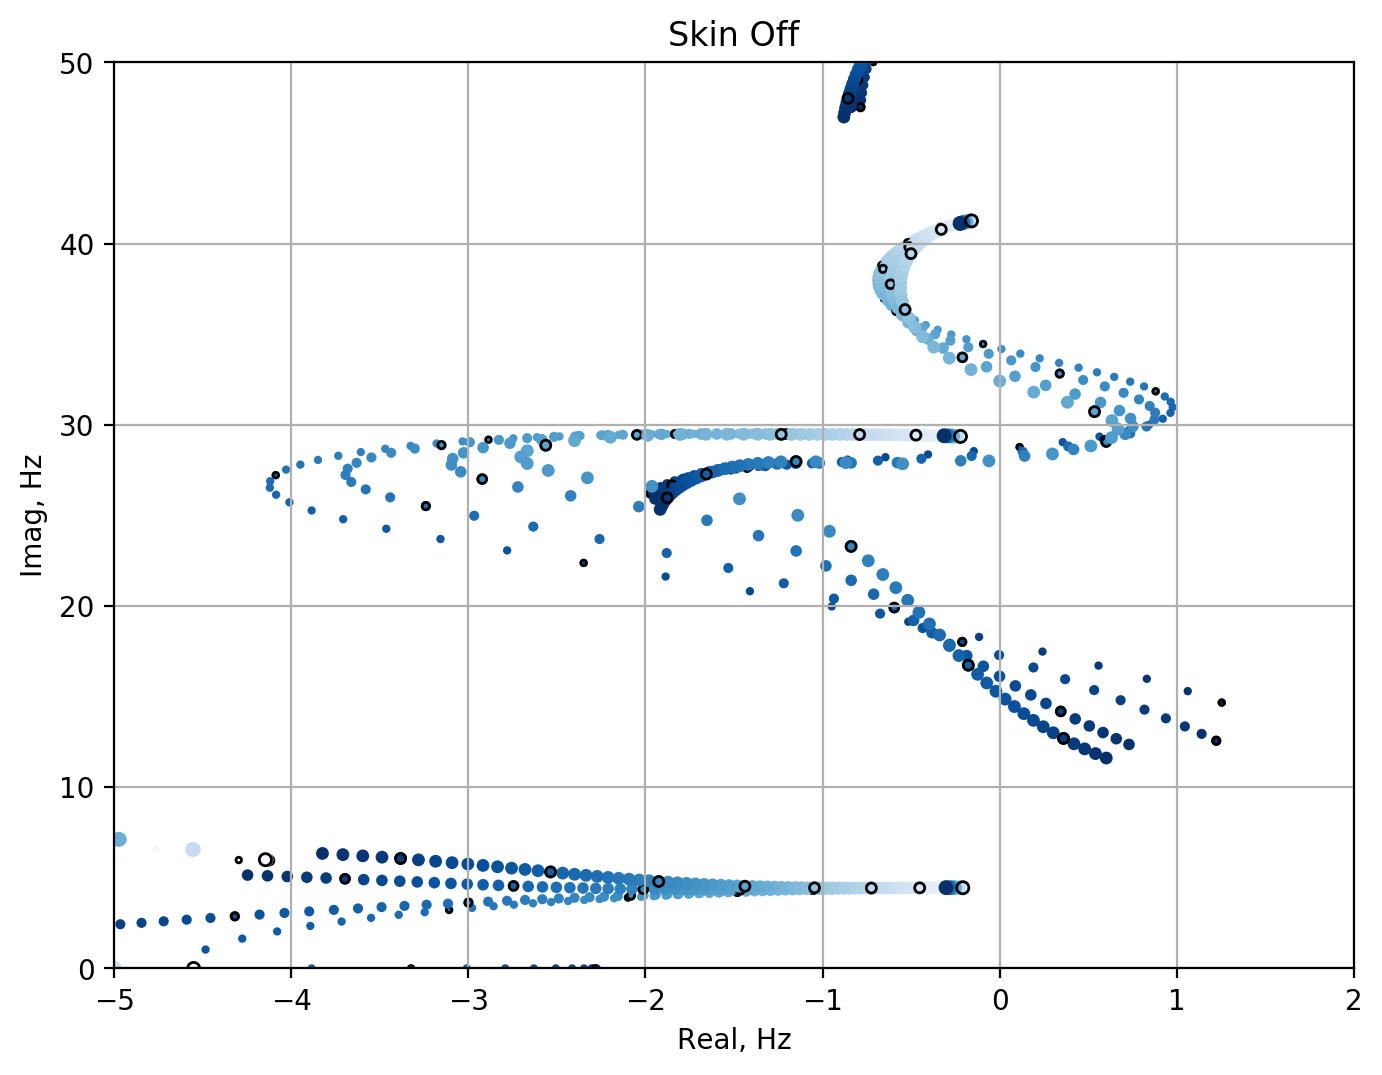

In [51]:
case = sharpy_results['wo_skin']

for ith, aoa in enumerate(case['alpha']):
    vel = case['v_eigs'][ith][:, 0]
    plt.scatter(case['v_eigs'][ith][:, 1] / 2 /np.pi, case['v_eigs'][ith][:, 2] /2 / np.pi, c=vel, s=4 + 3*ith, cmap='Blues')
    vel_f10 = (np.divmod(vel, 10)[1] == 0)
    plt.scatter(case['v_eigs'][ith][vel_f10, 1] / 2 /np.pi, case['v_eigs'][ith][vel_f10, 2] /2 / np.pi, edgecolor='k', color='none', s=4 + 3*ith)
plt.xlim(-5, 2)
plt.ylim(0, 50)
plt.grid()
plt.xlabel('Real, Hz')
plt.ylabel('Imag, Hz')
plt.title('Skin Off');

## Deflection at flutter speeds

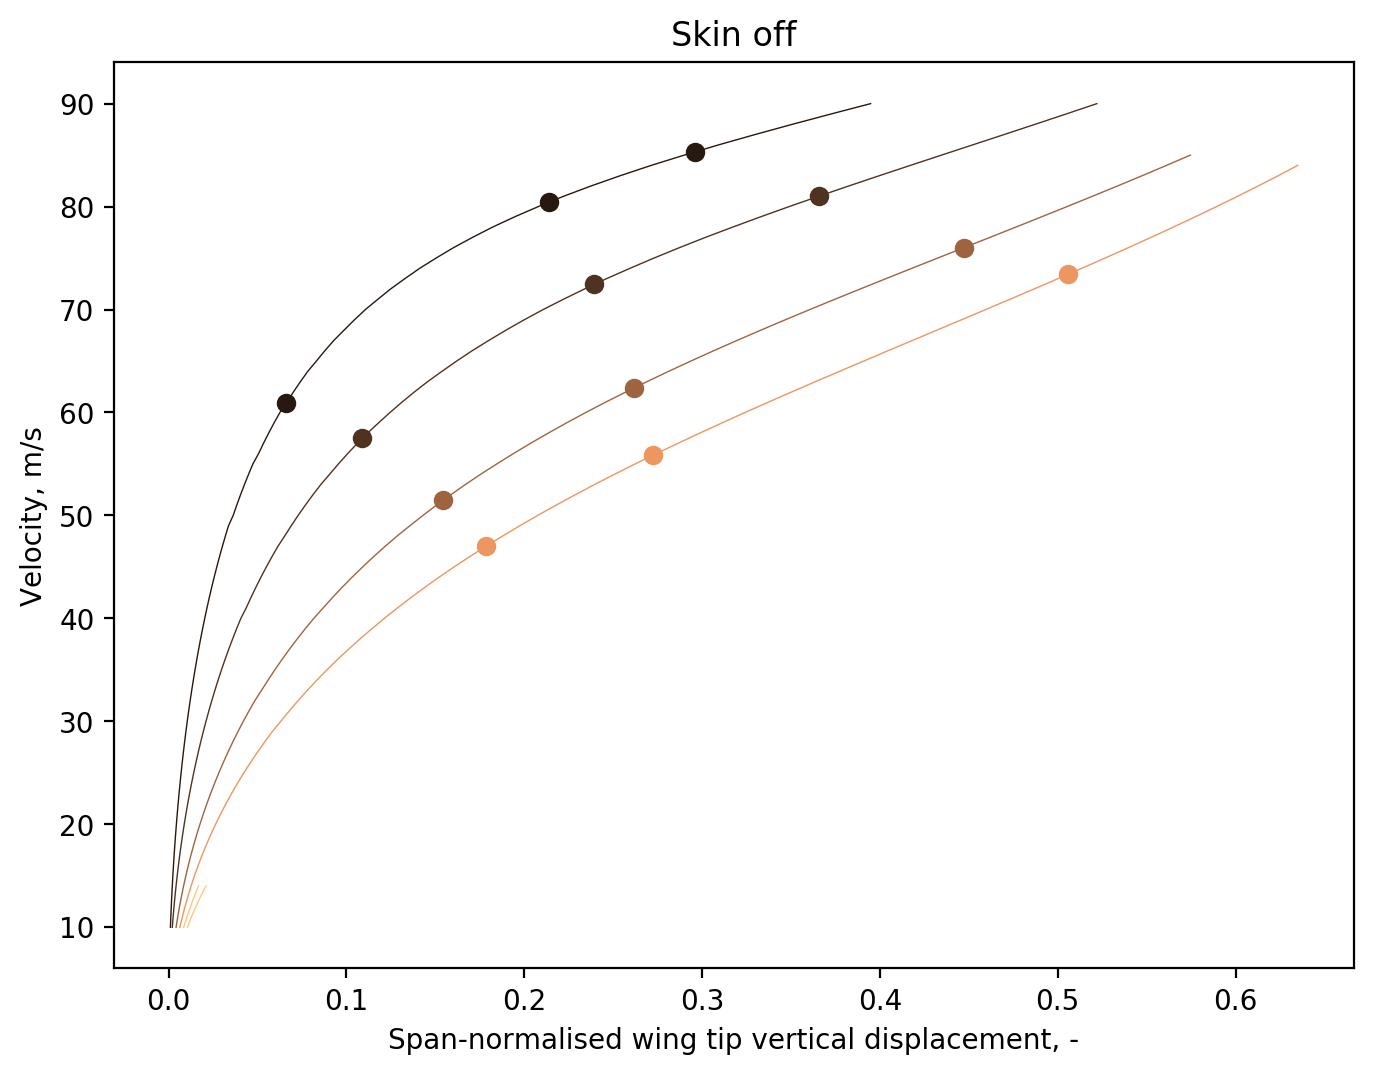

In [52]:
case = sharpy_results['wo_skin']

for ith, aoa in enumerate(case['alpha']):
    for i_speed in range(case['flutter_deflection'][ith].shape[0]):
        plt.scatter(case['flutter_deflection'][ith][i_speed, 1], case['flutter_deflection'][ith][i_speed, 0], color=cmap(nrm(aoa)))
    plt.plot(case['deflection'][ith][:, -1] / 0.55, case['deflection'][ith][:, 0], color=cmap(nrm(aoa)), lw=0.5)
    
plt.xlabel('Span-normalised wing tip vertical displacement, -')
plt.ylabel('Velocity, m/s')
plt.title('Skin off');